# P4 FAO

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

# Importation des fichiers et transformation des fichiers (formats, noms colonnes)

In [3]:
population=pd.read_excel('/Users/anapereira/Desktop/Projets/projet 4/DAN-P4-FAO/population.xlsx')

In [4]:
population['Valeur']= pd.to_numeric(population['Valeur'],errors = 'coerce')

In [5]:
population.rename(columns={'Valeur': 'nbre_habitants'}, inplace=True)

In [6]:
population['nbre_habitants'] *= 1000

In [7]:
population.head()

,Zone,Année,nbre_habitants
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [8]:
sous_nut=pd.read_excel('/Users/anapereira/Desktop/Projets/projet 4/DAN-P4-FAO/sous_nutrition.xlsx')

In [9]:
sous_nut['Valeur']= pd.to_numeric(sous_nut['Valeur'],errors = 'coerce')

In [10]:
sous_nut.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [11]:
sous_nut['sous_nutrition'] *= 1000000

In [12]:
sous_nut.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [13]:
dispo_alimentaire=pd.read_excel('/Users/anapereira/Desktop/Projets/projet 4/DAN-P4-FAO/dispo_alimentaire.xlsx')

In [14]:
dispo_alimentaire[['Aliments pour animaux','Autres Utilisations','Exportations - Quantité','Importations - Quantité',
                   'Nourriture','Pertes','Production','Semences','Traitement',
                   'Variation de stock']] = dispo_alimentaire[['Aliments pour animaux','Autres Utilisations',
                                                               'Exportations - Quantité','Importations - Quantité',
                                                               'Nourriture','Pertes','Production','Semences',
                                                               'Traitement',
                                                               'Variation de stock']].apply(pd.to_numeric,
                                                                                            errors = 'coerce')

In [15]:
dispo_alimentaire[['Aliments pour animaux','Autres Utilisations','Exportations - Quantité','Importations - Quantité',
                   'Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']] *= 1000

In [16]:
dispo_alimentaire['Disponibilité intérieure']*=1000

In [17]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53000.0,NaN,NaN,53000.0,NaN,53000.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2000.0,NaN,2000.0,2000.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82000.0,NaN,82000.0,82000.0,NaN,NaN,NaN,NaN,NaN


In [18]:
aide_alimentaire=pd.read_excel('/Users/anapereira/Desktop/Projets/projet 4/DAN-P4-FAO/aide_alimentaire.xlsx')

In [19]:
aide_alimentaire['Valeur']= pd.to_numeric(aide_alimentaire['Valeur'],errors = 'coerce')

In [20]:
aide_alimentaire.rename(columns={'Valeur': 'Quantite_aide'}, inplace=True)

In [21]:
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

# 1- La proportion de personnes en état de sous-nutrition

## Jointure sur 'Zone' entre population et sous_nut et séléction Année 2017 et 2016-2018

In [22]:
prop_sous_nutrition_2017 = pd.merge(population.loc[population['Année'] == 2017,['Zone', 'nbre_habitants']],
                               sous_nut.loc[sous_nut['Année'] == '2016-2018',['Zone', 'sous_nutrition']],
                               on='Zone')

In [23]:
print("En 2017, il y a ","{:.2f}".format(prop_sous_nutrition_2017['sous_nutrition'].sum()/1000000),
      "millions de personnes en sous-nutrition")

En 2017, il y a  535.70 millions de personnes en sous-nutrition


In [24]:
print("Proportion de personnes en état de sous-nutrition en 2017 :",
      "{:.2f}".format(prop_sous_nutrition_2017['sous_nutrition'].sum()
                      *100/prop_sous_nutrition_2017['nbre_habitants'].sum()), "%")

Proportion de personnes en état de sous-nutrition en 2017 : 7.10 %


# 2- Le nombre théorique de personnes qui pourraient être nourries

In [25]:
dispo_alimentaire_theorique = pd.merge(population.loc[population['Année'] == 2013,['Zone', 'nbre_habitants']],
                               dispo_alimentaire.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum(),
                               on='Zone')

In [26]:
dispo_alimentaire_theorique.head()

,Zone,nbre_habitants,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,32269589.0,2087.0
1,Afrique du Sud,53687121.0,3020.0
2,Albanie,2903790.0,3188.0
3,Algérie,38140133.0,3293.0
4,Allemagne,81174367.0,3503.0


In [27]:
dispo_alimentaire_theorique['Dispo_kcal'] = dispo_alimentaire_theorique[
    'Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_theorique['nbre_habitants']

In [28]:
dispo_alimentaire_theorique.head()

,Zone,nbre_habitants,Disponibilité alimentaire (Kcal/personne/jour),Dispo_kcal
0,Afghanistan,32269589.0,2087.0,6.734663e+10
1,Afrique du Sud,53687121.0,3020.0,1.621351e+11
2,Albanie,2903790.0,3188.0,9.257283e+09
3,Algérie,38140133.0,3293.0,1.255955e+11
4,Allemagne,81174367.0,3503.0,2.843538e+11


In [29]:
print("Nombre théorique de personnes qui pourraient être nourries :",
      "{:.2f}".format(dispo_alimentaire_theorique['Dispo_kcal'].sum()/2500 ))

Nombre théorique de personnes qui pourraient être nourries : 8017745251.16


In [30]:
print("Pourcentage de la population mondiale qui pourraient être nourrie :",
      "{:.2f}".format(dispo_alimentaire_theorique['Dispo_kcal'].sum()/2500*100/dispo_alimentaire_theorique
                      ['nbre_habitants'].sum()),"%")

Pourcentage de la population mondiale qui pourraient être nourrie : 115.04 %


# 3- Le nombre théorique de personnes qui pourraient être nourries (avec les produits végétaux uniquement)

In [31]:
etape_dispo_alimentaire=dispo_alimentaire.loc[dispo_alimentaire['Origine']== 'vegetale']

In [32]:
dispo_alimentaire_theorique_veg = pd.merge(population.loc[population['Année'] == 2013,['Zone', 'nbre_habitants']],
                               etape_dispo_alimentaire.groupby(
                                   ['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum(), 
                               on='Zone')

In [33]:
dispo_alimentaire_theorique_veg.head()

,Zone,nbre_habitants,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,32269589.0,1871.0
1,Afrique du Sud,53687121.0,2533.0
2,Albanie,2903790.0,2203.0
3,Algérie,38140133.0,2915.0
4,Allemagne,81174367.0,2461.0


In [34]:
dispo_alimentaire_theorique_veg['Dispo_kcal'] = dispo_alimentaire_theorique_veg[
    'Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_theorique_veg['nbre_habitants']

In [35]:
dispo_alimentaire_theorique_veg.head()

,Zone,nbre_habitants,Disponibilité alimentaire (Kcal/personne/jour),Dispo_kcal
0,Afghanistan,32269589.0,1871.0,6.037640e+10
1,Afrique du Sud,53687121.0,2533.0,1.359895e+11
2,Albanie,2903790.0,2203.0,6.397049e+09
3,Algérie,38140133.0,2915.0,1.111785e+11
4,Allemagne,81174367.0,2461.0,1.997701e+11


In [36]:
print("Nombre théorique de personnes qui pourraient être nourries avec les produits végétaux uniquement :",
      "{:.2f}".format(dispo_alimentaire_theorique_veg['Dispo_kcal'].sum()/2500 ))

Nombre théorique de personnes qui pourraient être nourries avec les produits végétaux uniquement : 6602669561.34


In [37]:
print("Pourcentage de la population mondiale qui pourraient être nourrie avec des produits végétaux uniquement :",
      "{:.2f}".format(dispo_alimentaire_theorique_veg['Dispo_kcal'].sum()/2500*100/dispo_alimentaire_theorique_veg
                      ['nbre_habitants'].sum()),"%")

Pourcentage de la population mondiale qui pourraient être nourrie avec des produits végétaux uniquement : 94.73 %


# 4- Utilisation de la disponibilité intérieure (alimentation animale, nourriture humaine et pertes)

In [38]:
print("Part utilisée pour la nourriture humaine de la disponibilité intérieure : ",
      "{:.2f}".format(dispo_alimentaire['Nourriture'].sum()*100/dispo_alimentaire['Disponibilité intérieure'].sum()),
      "%")

Part utilisée pour la nourriture humaine de la disponibilité intérieure :  49.51 %


In [39]:
print("Part utilisée pour l'alimentation animale de la disponibilité intérieure : ",
      "{:.2f}".format(dispo_alimentaire['Aliments pour animaux'].sum()*100/dispo_alimentaire
                      ['Disponibilité intérieure'].sum()), "%")

Part utilisée pour l'alimentation animale de la disponibilité intérieure :  13.24 %


In [40]:
print("Part perdue de la disponibilité intérieure : ",
      "{:.2f}".format(dispo_alimentaire['Pertes'].sum()*100/dispo_alimentaire['Disponibilité intérieure'].sum()), "%")

Part perdue de la disponibilité intérieure :  4.61 %


In [41]:
dispo_test=dispo_alimentaire['Disponibilité intérieure'].sum()
for e in ['Nourriture','Pertes','Aliments pour animaux','Autres Utilisations','Semences','Traitement'] :
        print("Proportion de ",e,"{:.2f}".format(dispo_alimentaire[e].sum()*100/dispo_test), "%")                    

Proportion de  Nourriture 49.51 %
Proportion de  Pertes 4.61 %
Proportion de  Aliments pour animaux 13.24 %
Proportion de  Autres Utilisations 8.78 %
Proportion de  Semences 1.57 %
Proportion de  Traitement 22.38 %


## Utilisation de la disponibilité intérieure : illustrations des données

In [42]:
dispo_pour_plot = dispo_alimentaire[['Nourriture','Pertes','Aliments pour animaux','Autres Utilisations','Semences',
                                     'Traitement']].copy()

In [43]:
dispo_pour_plot1=dispo_pour_plot.sum(axis=0)
print(dispo_pour_plot1)

Nourriture               4.876258e+09
Pertes                   4.536980e+08
Aliments pour animaux    1.304245e+09
Autres Utilisations      8.650230e+08
Semences                 1.546810e+08
Traitement               2.204687e+09
dtype: float64


In [44]:
plage_donnees = ['Nourriture','Pertes','Aliments pour animaux','Autres Utilisations','Semences','Traitement']

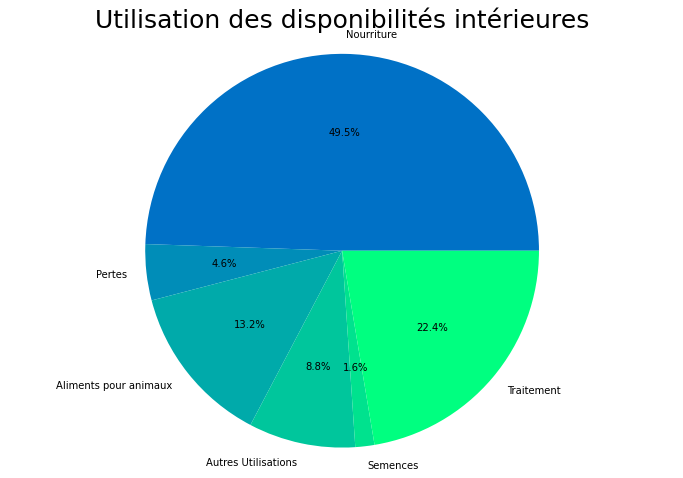

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(12,8))
plt.pie(dispo_pour_plot1,labels=plage_donnees,autopct='%1.1f%%',
        colors=['#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'])
plt.title('Utilisation des disponibilités intérieures',fontsize=25)
plt.axis('equal')
plt.show()
plt.savefig('Utilisation_dispo_interieures.png')

# 5- Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [46]:
prop_sous_nutrition_2017['proportion_par_pays']=prop_sous_nutrition_2017[
    'sous_nutrition']*100/prop_sous_nutrition_2017['nbre_habitants']
prop_sous_nutrition_2017.head()

,Zone,nbre_habitants,sous_nutrition,proportion_par_pays
0,Afghanistan,36296113.0,10500000.0,28.928718
1,Afrique du Sud,57009756.0,3100000.0,5.437666
2,Albanie,2884169.0,100000.0,3.467203
3,Algérie,41389189.0,1300000.0,3.140917
4,Allemagne,82658409.0,NaN,NaN


In [47]:
prop_sous_nutrition_2017[['Zone','proportion_par_pays']].sort_values(
    'proportion_par_pays',ascending=False).head(10)

,Zone,proportion_par_pays
78,Haïti,48.259182
157,République populaire démocratique de Corée,47.188685
108,Madagascar,41.062924
103,Libéria,38.279742
100,Lesotho,38.249438
183,Tchad,37.957606
161,Rwanda,35.055619
121,Mozambique,32.810898
186,Timor-Leste,32.173531
0,Afghanistan,28.928718


# 6- Les pays qui ont le plus bénéficié d’aide depuis 2013

In [48]:
total_aide_alimentaire=aide_alimentaire[['Zone','Quantite_aide']].groupby(['Zone']).sum()
total_aide_alimentaire.sort_values('Quantite_aide',ascending=False).head(10)

,Quantite_aide
Zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


# 7.1- Les pays ayant le plus de disponibilité par habitant

In [49]:
dispo_alimentaire_theorique.head()

,Zone,nbre_habitants,Disponibilité alimentaire (Kcal/personne/jour),Dispo_kcal
0,Afghanistan,32269589.0,2087.0,6.734663e+10
1,Afrique du Sud,53687121.0,3020.0,1.621351e+11
2,Albanie,2903790.0,3188.0,9.257283e+09
3,Algérie,38140133.0,3293.0,1.255955e+11
4,Allemagne,81174367.0,3503.0,2.843538e+11


In [50]:
dispo_alimentaire_theorique2=dispo_alimentaire_theorique[
    ['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby(['Zone']).sum()
dispo_alimentaire_theorique2.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


# 7.2- Les pays ayant le moins de disponibilité par habitant

In [51]:
dispo_alimentaire_theorique2.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


# 8- Les pays qui semblent être le plus en difficulté au niveau alimentaire (données 2013)

### Calcul de la proportion de sous-nutrition par pays en 2013 pour utilisation ultérieure

In [52]:
prop_sous_nutrition_2013 = pd.merge(population.loc[population['Année'] == 2013,['Zone', 'nbre_habitants']],
                               sous_nut.loc[sous_nut['Année'] == '2012-2014',['Zone', 'sous_nutrition']],
                               on='Zone')

In [53]:
print(prop_sous_nutrition_2013['nbre_habitants'].sum())

7206670140.0


In [54]:
prop_sous_nutrition_2013['proportion_par_pays']=prop_sous_nutrition_2013[
    'sous_nutrition']*100/prop_sous_nutrition_2013['nbre_habitants']

In [55]:
prop_sous_nutrition_2013[['Zone','proportion_par_pays']].sort_values('proportion_par_pays',ascending=False).head(10)

,Zone,proportion_par_pays
78,Haïti,49.035279
157,République populaire démocratique de Corée,41.316518
183,Tchad,37.063839
103,Libéria,35.307958
186,Timor-Leste,34.683264
108,Madagascar,33.099236
171,Sierra Leone,32.051371
44,Congo,30.284925
6,Angola,29.213038
158,République-Unie de Tanzanie,27.844737


## 8-1 Utilisation des céréales part nourriture et part alimentation animale 2013

#### dispo_alimentaire selectionner Produit = ('les cereales')

In [56]:
dispo_cereales=dispo_alimentaire[
    dispo_alimentaire['Produit'].isin(['Avoine','Blé','Céréales, Autres','Maïs','Millet','Orge',
                                       'Riz /(Eq Blanchi/)','Sorgho','Seigle'])]

In [57]:
dispo_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992000.0,NaN,1173000.0,4895000.0,775000.0,5169000.0,322000.0,NaN,-350000.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200000.0,NaN,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13000.0,NaN,NaN,12000.0,1000.0,13000.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360000.0,NaN,26.0,2.92,0.24,0.79,524000.0,NaN,10000.0,89000.0,52000.0,514000.0,22000.0,NaN,0.0


### Répartition de l'utilisation des céréales en 2013

In [58]:
dispo_cereales_pourcentage=dispo_cereales['Disponibilité intérieure'].sum()
for e in ['Nourriture','Pertes','Aliments pour animaux','Autres Utilisations','Semences','Traitement'] :
        print("Proportion de ",e,"{:.2f}".format(dispo_cereales[e].sum()*100/dispo_cereales_pourcentage), "%") 

Proportion de  Nourriture 33.74 %
Proportion de  Pertes 4.13 %
Proportion de  Aliments pour animaux 43.49 %
Proportion de  Autres Utilisations 11.20 %
Proportion de  Semences 2.92 %
Proportion de  Traitement 4.55 %


In [59]:
utilisation_cereales_toutescat=dispo_cereales[
    ['Nourriture','Pertes','Aliments pour animaux','Autres Utilisations','Semences','Traitement']]

In [60]:
total_utilisation_cereales_toutescat = utilisation_cereales_toutescat.sum(axis=0)

In [61]:
plage_donnees_3=['Nourriture','Pertes','Aliments pour animaux','Autres Utilisations','Semences','Traitement']

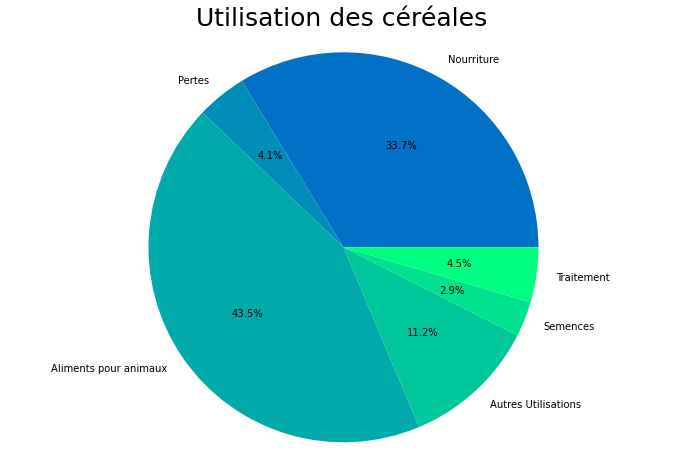

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(12,8))
plt.pie(total_utilisation_cereales_toutescat,labels=plage_donnees_3,autopct='%1.1f%%',
        colors = ['#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'])
plt.title('Utilisation des céréales',fontsize=25)
plt.axis('equal')
plt.show()
plt.savefig('Utilisation_cereales_monde.png')

### Utilisation de la disponibilité : comparaison des proportions utilisées pour l'alimentation animale et humaine

In [63]:
utilisation_cereales=dispo_cereales[['Aliments pour animaux','Nourriture']]

In [64]:
total_utilisation_cereales = utilisation_cereales.sum(axis=0)
print (total_utilisation_cereales)

Aliments pour animaux    839941000.0
Nourriture               651724000.0
dtype: float64


In [65]:
plage_donnees_2=['Aliments pour animaux','Nourriture']

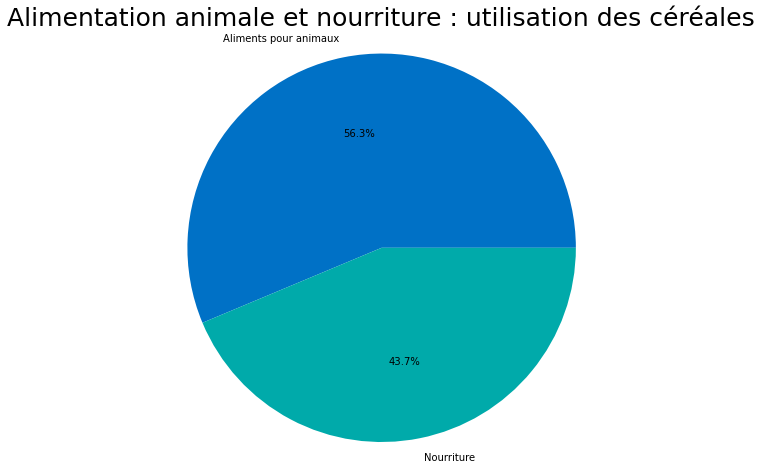

<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize=(12,8))
plt.pie(total_utilisation_cereales,labels=plage_donnees_2,autopct='%1.1f%%',colors=['#0071C6','#00AAAA'])
plt.title('Alimentation animale et nourriture : utilisation des céréales',fontsize=25)
plt.axis('equal')
plt.show()
plt.savefig('Alimentation_animale_humaine.png')

## 8-3 Allocation de la production de manioc en Thaillande : 
L'exportation dépasse largement la part réservée à la nourriture malgré un taux de sous-nutrition élevé dans le pays (6,2 millions de personnes sous alimentées en 2013).

In [67]:
manioc= dispo_alimentaire[(dispo_alimentaire['Zone']=='Thaïlande')&(dispo_alimentaire['Produit']=='Manioc')]
manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,NaN,0.0,0.0


In [68]:
essaie_manioc_2=manioc['Production'].sum()
for n in ['Nourriture','Exportations - Quantité'] :
        print("Proportion de ",n,"{:.2f}".format(manioc[n].sum()*100/essaie_manioc_2), "%")

Proportion de  Nourriture 2.88 %
Proportion de  Exportations - Quantité 83.41 %


In [69]:
plage_donnees_prod_x=['Nourriture','Exportations - Quantité']

In [70]:
plage_donnees_prod_y=[0.871,25.214]

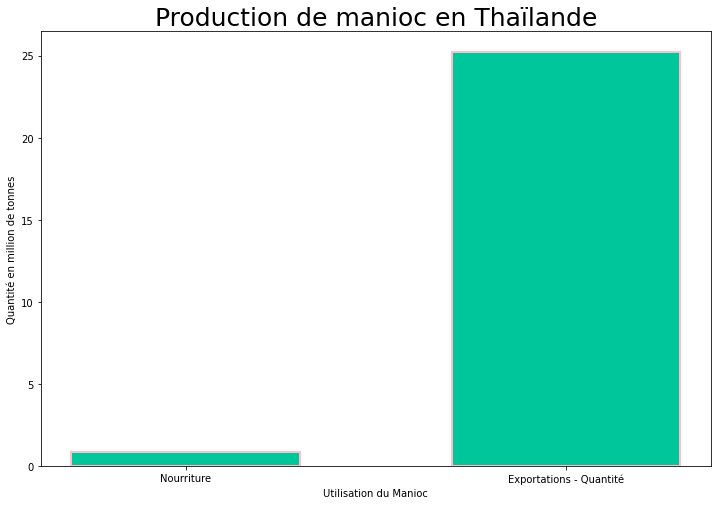

In [71]:
plt.figure(figsize=(12,8))
plt.bar(plage_donnees_prod_x,plage_donnees_prod_y, width = 0.6, color = '#00C69C',
  edgecolor = 'pink',linewidth = 2)
plt.title('Production de manioc en Thaïlande',fontsize=25)
plt.ylabel('Quantité en million de tonnes')
plt.xlabel('Utilisation du Manioc')
plt.savefig('manioc.png')

### Proportion de personnes en état de sous-nutrition en Thaîlande.

In [72]:
proportion_sousnut_thailande=prop_sous_nutrition_2013[(prop_sous_nutrition_2013['Zone']=='Thaïlande')]
print(proportion_sousnut_thailande)

          Zone  nbre_habitants  sous_nutrition  proportion_par_pays
185  Thaïlande      68144518.0       6200000.0             9.098311


### La Thaïlande est le premier exportateur mondial de manioc (25 Millards de tonnes).

In [73]:
premier_exportateur_manioc=dispo_alimentaire[(dispo_alimentaire['Produit']=='Manioc')]

In [74]:
premier_exportateur_manioc[['Zone','Produit','Exportations - Quantité']].sort_values(
    'Exportations - Quantité',ascending=False).head(5)

,Zone,Produit,Exportations - Quantité
13809,Thaïlande,Manioc,25214000.0
14743,Viet Nam,Manioc,8973000.0
6334,Indonésie,Manioc,820000.0
2665,Cambodge,Manioc,254000.0
10752,Paraguay,Manioc,164000.0


In [75]:
chiffre_thai=premier_exportateur_manioc[(premier_exportateur_manioc['Zone']=='Thaïlande')]

In [76]:
print("Part de l'exportation mondiale de manioc réalisée par la Thaïlande :",
      chiffre_thai['Exportations - Quantité']*100/premier_exportateur_manioc['Exportations - Quantité'].sum(),"%")

Part de l'exportation mondiale de manioc réalisée par la Thaïlande : 13809    69.937868
Name: Exportations - Quantité, dtype: float64 %


## 8-4 Le taux de sous-nutrition est corrélé négativement à la disponibilté alimentaire :
Une disponibilité alimentaire faible se traduit par un taux de sous-nutrition élevé.


In [77]:
dispo_alimentaire_theorique.head()

,Zone,nbre_habitants,Disponibilité alimentaire (Kcal/personne/jour),Dispo_kcal
0,Afghanistan,32269589.0,2087.0,6.734663e+10
1,Afrique du Sud,53687121.0,3020.0,1.621351e+11
2,Albanie,2903790.0,3188.0,9.257283e+09
3,Algérie,38140133.0,3293.0,1.255955e+11
4,Allemagne,81174367.0,3503.0,2.843538e+11


In [78]:
dispo_kcal_10pays_2013=pd.merge(
    dispo_alimentaire_theorique[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']],
                               prop_sous_nutrition_2013[['Zone','proportion_par_pays']], 
                               on='Zone')

In [79]:
dispo_kcal_10pays_2013.sort_values('proportion_par_pays',ascending=False).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),proportion_par_pays
70,Haïti,2089.0,49.035279
136,République populaire démocratique de Corée,2093.0,41.316518
156,Tchad,2109.0,37.063839
93,Libéria,2206.0,35.307958
158,Timor-Leste,2129.0,34.683264
97,Madagascar,2056.0,33.099236
147,Sierra Leone,2401.0,32.051371
39,Congo,2206.0,30.284925
5,Angola,2474.0,29.213038
137,République-Unie de Tanzanie,2204.0,27.844737


In [80]:
dispo_kcal_10pays_2013.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),proportion_par_pays
131,République centrafricaine,1879.0,NaN
170,Zambie,1924.0,NaN
97,Madagascar,2056.0,33.099236
0,Afghanistan,2087.0,26.650479
70,Haïti,2089.0,49.035279
136,République populaire démocratique de Corée,2093.0,41.316518
156,Tchad,2109.0,37.063839
171,Zimbabwe,2113.0,NaN
120,Ouganda,2126.0,NaN
55,Éthiopie,2129.0,27.467401


In [81]:
x=dispo_kcal_10pays_2013['Disponibilité alimentaire (Kcal/personne/jour)']

In [82]:
y=dispo_kcal_10pays_2013['proportion_par_pays']

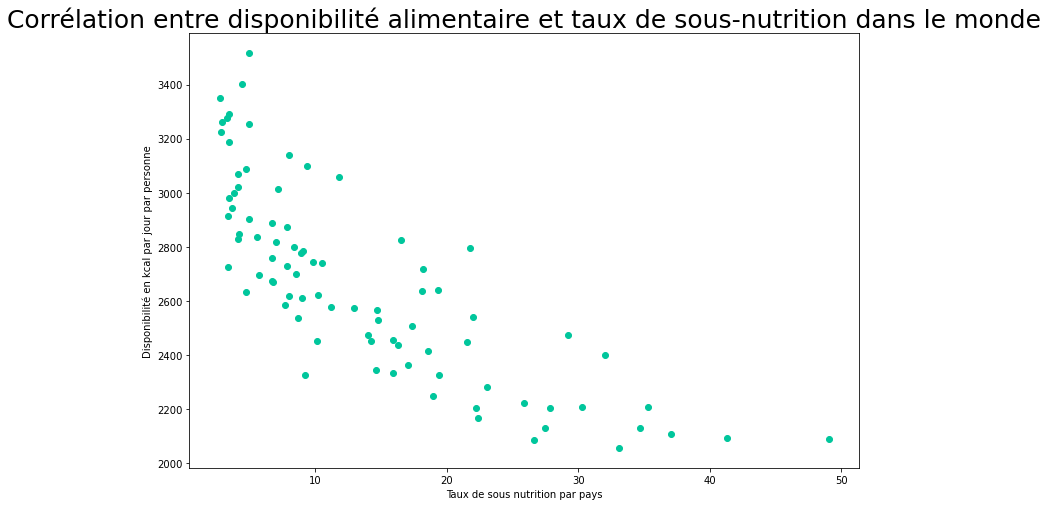

In [83]:
plt.figure(figsize=(12,8))
plt.scatter(y,x,color='#00C69C')
plt.ylabel('Disponibilité en kcal par jour par personne')
plt.xlabel('Taux de sous nutrition par pays')
plt.title('Corrélation entre disponibilité alimentaire et taux de sous-nutrition dans le monde',fontsize=25)
plt.savefig('Corrélationdispoal_txsousnut.png')

## 8-5 Evolution des quantités d'aides

In [84]:
aide_alimentaire.head()

,Zone,Année,Produit,Quantite_aide
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [85]:
aide_alim=aide_alimentaire[['Année','Quantite_aide']]

In [86]:
evol_aide_alimentaire=aide_alim.groupby(['Année'])[['Quantite_aide']].sum()

In [87]:
print(evol_aide_alimentaire)

       Quantite_aide
Année               
2013         4165674
2014         3939152
2015         2187507
2016          743568


In [88]:
plage_donnees_5=['2013','2014','2015','2016']

In [89]:
plage_donnees_6= [4.165674,3.939152,2.187507,0.743568]

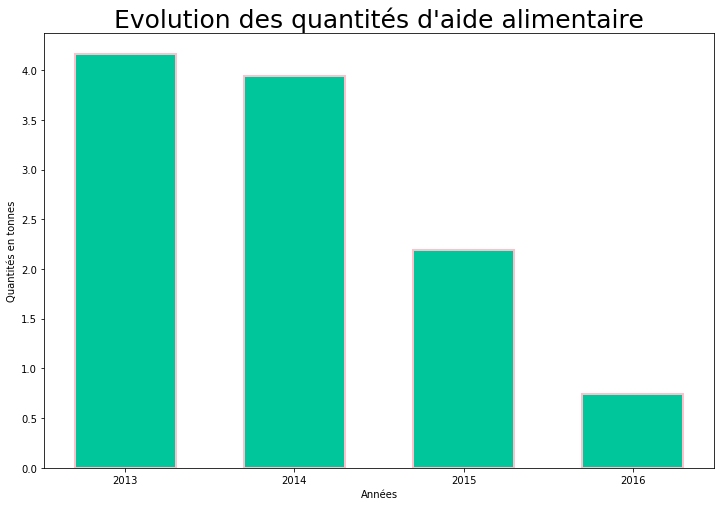

In [90]:
plt.figure(figsize=(12,8))
plt.bar(plage_donnees_5,plage_donnees_6, width = 0.6, color = '#00C69C',
  edgecolor = 'pink', linewidth = 2)
plt.title('Evolution des quantités d\'aide alimentaire',fontsize=25)
plt.ylabel('Quantités en tonnes')
plt.xlabel('Années')
plt.savefig('Evolution_quantité_aide.png')

### Alors que le nombre de personnes en sous-nutrition est en augmentation dans le monde...

In [91]:
sous_nut_evol=sous_nut[['Année','sous_nutrition']]

In [92]:
sous_nut_evol=sous_nut_evol.groupby(['Année'])[['sous_nutrition']].sum()
print(sous_nut_evol)

           sous_nutrition
Année                    
2012-2014     528100000.0
2013-2015     523500000.0
2014-2016     524700000.0
2015-2017     528600000.0
2016-2018     535700000.0
2017-2019     544200000.0


In [93]:
plage_donnees_ss_nut1=['2013','2014','2015','2016','2017','2018']

In [94]:
plage_donnees_ss_nut2=[528,524,525,529,536,544]

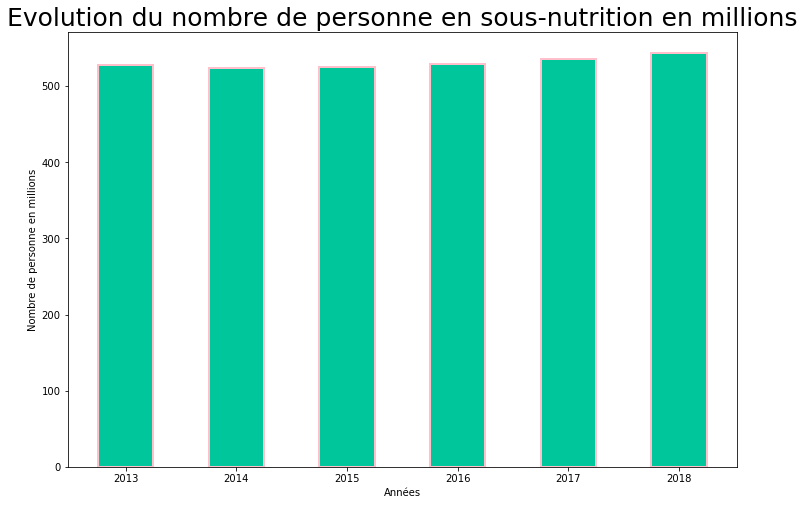

In [95]:
plt.figure(figsize=(12,8))
plt.bar(plage_donnees_ss_nut1,plage_donnees_ss_nut2,width = 0.5, color = '#00C69C',
  edgecolor = 'pink', linewidth = 2)
plt.title('Evolution du nombre de personne en sous-nutrition en millions',fontsize=25)
plt.ylabel('Nombre de personne en millions')
plt.xlabel('Années')
plt.savefig('Evolution_sous_nut_barplot.png')